In [38]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() 
import sklearn as sk

In [39]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
#Drop irrelevant columns
pdata = (data.drop(columns=['Ticket', 'Cabin', 'PassengerId', 'Name'], axis = 1))

In [63]:
trd = pd.read_csv('titanic_train.csv')
tsd = pd.read_csv('titanic_test.csv')
pdata = pd.concat([trd, tsd], ignore_index=True, sort  = False)

In [64]:
pdata.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Text(0.5, 1.0, 'Missing values heatmap')

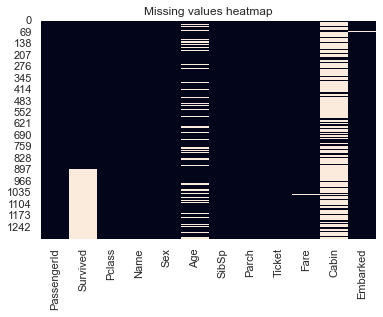

In [65]:
pdata.isnull().sum()
sb.heatmap(pdata.isnull(), cbar = False).set_title("Missing values heatmap")

In [69]:
pdata.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
pdata['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/Users/xtrology/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

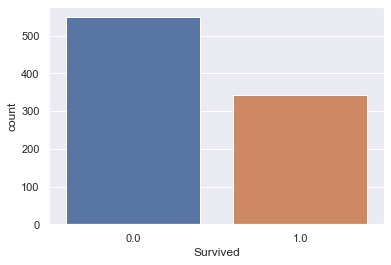

In [27]:
sb.countplot( pdata['Survived'])

/Users/xtrology/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

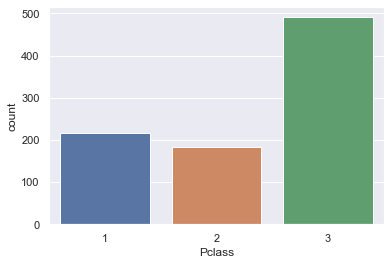

In [20]:
sb.countplot( pdata['Pclass'])

/Users/xtrology/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

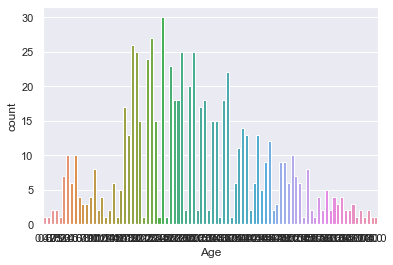

In [21]:
sb.countplot( pdata['Age'])

In [22]:
pdata.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [33]:
pdata.pivot_table('Survived', index='Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='Sex'>

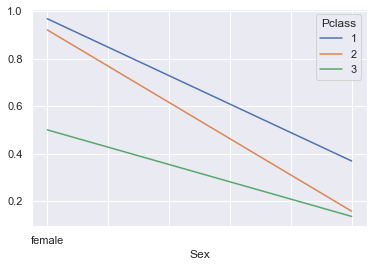

In [35]:
pdata.pivot_table('Survived', index='Sex', columns = 'Pclass').plot()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

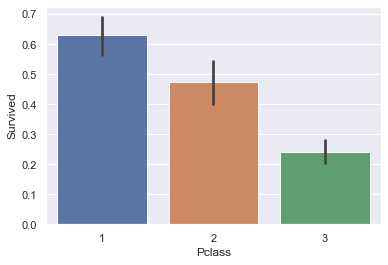

In [36]:
#plot survival rate of each class
sb.barplot(x = 'Pclass', y = 'Survived', data = pdata)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

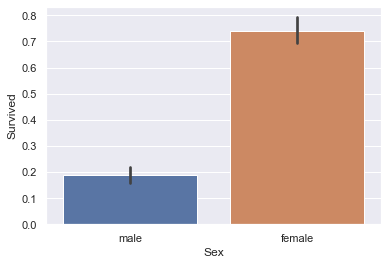

In [37]:
#plot survival rate of gender
sb.barplot(x = 'Sex', y = 'Survived', data = pdata)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

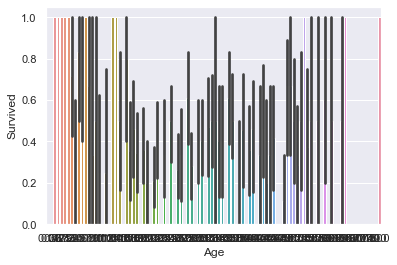

In [38]:
#plot survival by age
sb.barplot(x = 'Age', y = 'Survived', data = pdata)

In [91]:
age = pd.cut(pdata['Age'], [0, 18, 80])
pdata.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass        1  2  3
Sex Age              
0   (0, 18]   0  0  0
    (18, 80]  0  0  0
1   (0, 18]   1  1  1
    (18, 80]  1  1  1

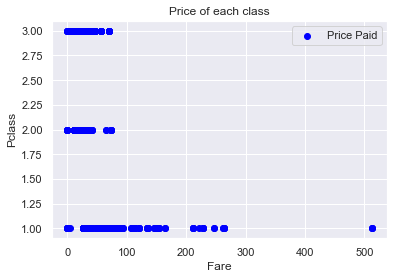

In [23]:
plt.scatter(pdata['Fare'], pdata['Pclass'], color = 'blue', label = 'Price Paid')
plt.ylabel('Pclass')
plt.xlabel('Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [90]:
pdata.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [71]:
for val in pdata:
    print(pdata[val].value_counts())
    print()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64



In [100]:
#Drop irrelevant columns
#pdata = pdata.drop(['Ticket', 'Cabin'], axis = 1)

#Remove missing values
pdata = pdata.dropna( subset = ['Embarked', 'Age'])

In [101]:
pdata.shape

(714, 8)

Text(0.5, 1.0, 'Missing values heatmap')

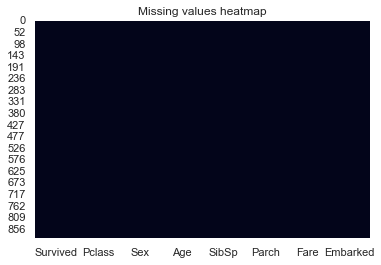

In [127]:
pdata.isnull().sum()
sb.heatmap(pdata.isnull(), cbar = False).set_title("Missing values heatmap")

In [128]:
pdata.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [129]:
pdata.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.406162,29.699118,0.512605,0.431373,34.694514,1.236695
std,0.491460,0.838250,0.491460,14.526497,0.929783,0.853289,52.918930,0.838250
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000,2.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,2.000000


In [104]:
#print the unique values in columns
print(pdata['Sex'].unique())
print(pdata['Embarked'].unique())

[0 1]
[2 0 1]


In [98]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode sex column
pdata.iloc[:, 2] = labelencoder.fit_transform( pdata.iloc[:, 0].values)

#encode embarked column
pdata.iloc[:, 7] = labelencoder.fit_transform( pdata.iloc[:, 1].values)

In [77]:
#print the unique values in columns
print(pdata['Sex'].unique())
print(pdata['Embarked'].unique())

[0 1]
[2 0 1]


In [105]:
pdata.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [132]:
#separate data into independent 'X' and dependent 'Y' variables
X = pdata.iloc[:, 1:8 ].values
Y = pdata.iloc[:, 0].values

In [133]:
#split dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [134]:
#scale the data
from sklearn.preprocessing import StandardScaler
sdsc = StandardScaler()
X_train = sdsc.fit_transform(X_train)
X_test = sdsc.fit_transform(X_test)

In [135]:
#Create a function for machine learning models
def models(X_train, Y_train):
    #Import and use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    logR = LogisticRegression(random_state = 0)
    logR.fit(X_train, Y_train)
    
    #Import and use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knc.fit(X_train, Y_train)
    
    #Import and use SVC(linear kernel)
    from sklearn.svm import SVC
    svc_linear = SVC(kernel='linear', random_state = 0)
    svc_linear.fit(X_train, Y_train)
    
    #Import and use SVC(RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Import and use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Import and use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    #Import and use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #Print training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', logR.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ', knc.score(X_train, Y_train))
    print('[2]Support Vector Classifier(SVC) linear Training Accuracy: ', svc_linear.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))

    return logR, knc, svc_linear, svc_rbf, gauss, tree, forest

In [136]:
#Get and train all the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  1.0
[1]K Neighbors Training Accuracy:  0.9899799599198397
[2]Support Vector Classifier(SVC) linear Training Accuracy:  1.0
[3]SVC RBF Training Accuracy:  1.0
[4]Gaussian NB Training Accuracy:  1.0
[5]Decision Tree Training Accuracy:  1.0
[6]Random Forest Training Accuracy:  1.0


In [137]:
#Display confusion matrix and accuracy of all models in the test data
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    #Extract true negative, true positive, false positive, false negative values
    tn, tp, fp, fn = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = (tp + tn)/(tp + tn + fp + fn)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[125   0]
 [  0  90]]
Model[0] Testing Accuracy = "0.5813953488372093"

[[123   2]
 [  1  89]]
Model[1] Testing Accuracy = "0.5813953488372093"

[[125   0]
 [  0  90]]
Model[2] Testing Accuracy = "0.5813953488372093"

[[124   1]
 [  0  90]]
Model[3] Testing Accuracy = "0.5813953488372093"

[[125   0]
 [  0  90]]
Model[4] Testing Accuracy = "0.5813953488372093"

[[125   0]
 [  0  90]]
Model[5] Testing Accuracy = "0.5813953488372093"

[[124   1]
 [  0  90]]
Model[6] Testing Accuracy = "0.5813953488372093"



In [149]:
#Get importance of feature
logR = model[5]
importances = pd.DataFrame({'feature': pdata.iloc[:, 1:8].columns, 'importance': np.round(logR.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
Sex,1.0
Pclass,0.0
Age,0.0
SibSp,0.0
Parch,0.0
Fare,0.0
Embarked,0.0


In [139]:
#Get importance of feature
forest = model[6]
importances = pd.DataFrame({'feature': pdata.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)} )
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
Sex,0.805
Fare,0.071
Age,0.045
Embarked,0.038
Parch,0.015
SibSp,0.014
Pclass,0.012


<AxesSubplot:xlabel='feature'>

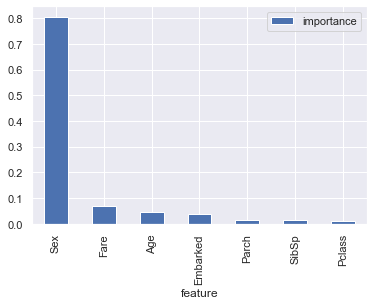

In [140]:
#Visualise importances
importances.plot.bar()

In [151]:
#print prediction of random forest classifier
pred_rfc = model[6].predict(X_test)
print(pred_rfc)

print()

#print actual values
print(Y_test)

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0]

[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0]
